In [25]:
from bisect import bisect_left
from itertools import accumulate

from matplotlib import pyplot as plt

import utils
inp = utils.get_input(2025,2,"input")
inp = inp[0].split(',')
inp = [r.split('-') for r in inp]
inp = [(int(x),int(y)) for x,y in inp]

In [21]:
import seaborn as sns
p1,p2 = 0,0
for x,y in inp:
    for curr in range(x,y+1):
        s = str(curr)
        def findp1(s):
            m = len(s)//2
            return s[:m]==s[m:]
        def findp2(s):
            n = len(s)
            for widths in range(1,n//2 + 1):
                if n%widths==0:
                    arr = []
                    for i in range(0,n,widths):
                        arr.append(s[i:i+widths])
                    if all([a==arr[-1] for a in arr]):
                        return True
            return False
        p1 += findp1(s)*curr
        p2 += findp2(s)*curr

print('p1',p1)
print('p2',p2)

p1 5398419778
p2 15704845910


In [22]:
p1_nums = set()
p2_nums = set()
MAX_N = 11

for exp in range(1,6):
    minsub = 10**(exp-1)
    maxsub = minsub*10
    maxgroups = MAX_N//exp
    for num in range(minsub,maxsub):
        val = 0
        for group in range(1,maxgroups+1):
            val *= maxsub
            val += num
            if group == 2:
                p1_nums.add(val)
            if group >= 2:
                p2_nums.add(val)
p1_nums = list(p1_nums)
p2_nums = list(p2_nums)
p1_nums.sort()
p2_nums.sort()
p1_acc = list(accumulate(p1_nums))
p2_acc = list(accumulate(p2_nums))

In [24]:
from bisect import bisect_left,bisect_right
p1,p2 = 0,0
for x,y in inp:
    p1r,p1l = bisect_right(p1_nums,y)-1,bisect_left(p1_nums,x)
    p2r,p2l = bisect_right(p2_nums,y)-1,bisect_left(p2_nums,x)
    if p1l <= p1r:
        p1 += p1_acc[p1r]-p1_acc[p1l]+p1_nums[p1l]
    if p2l <= p2r:
        p2 += p2_acc[p2r]-p2_acc[p2l]+p2_nums[p2l]
print('p1',p1)
print('p2',p2)

p1 5398419778
p2 15704845910


<Axes: ylabel='Count'>

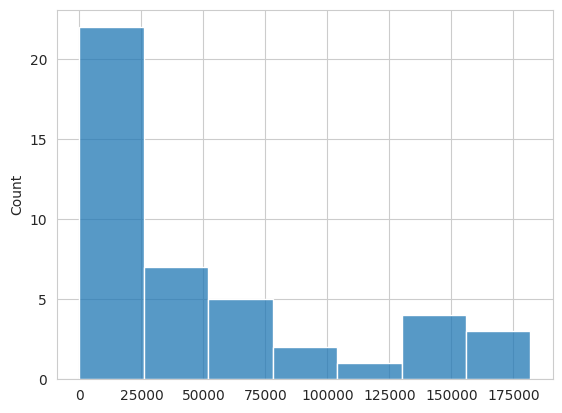

In [34]:
import seaborn as sns
sns.histplot([y-x for x,y in inp])

<Axes: ylabel='Count'>

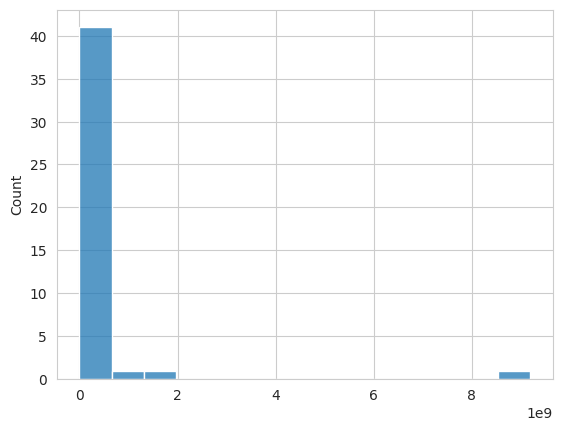

In [33]:
sns.histplot([x for x,y in inp])

In [ ]:
sns.scatterplot()